# Importing Libraries

In [3]:
import nltk
import re

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import pandas as pd 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

#PROJECT ROUND 2
from nltk.corpus import wordnet
from nltk.corpus import wordnet as wn


# print(wordnet.sysnet('room'))


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

# For SWE Textbook

In [5]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saksham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saksham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Saksham\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Reading book and converting it into text variable

In [8]:
file = open("SWE.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)


In [9]:
text

"GlobaleditionSoftware EngineeringTENTH editionIan SommervilleSoftware EngineeringTenth EditionIan SommervilleBoston\u2002\u2002Columbus\u2002\u2002Indianapolis\u2002\u2002New York\u2002\u2002San Francisco\u2002\u2002HobokenAmsterdam\u2002\u2002Cape Town\u2002\u2002Dubai\u2002\u2002London\u2002\u2002Madrid\u2002\u2002Milan\u2002\u2002Munich\u2002\u2002Paris\u2002\u2002Montreal\u2002\u2002TorontoDelhi\u2002\u2002Mexico City\u2002\u2002São Paulo\u2002\u2002Sydney\u2002\u2002Hong Kong\u2002\u2002Seoul\u2002\u2002Singapore\u2002\u2002Taipei\u2002\u2002TokyoEditorial Director: Marcia HortonEditor in Chief: Michael HirschAcquisitions Editor: Matt GoldsteinEditorial Assistant: Chelsea BellAssistant Acquisitions Editor, GlobalEdition: Murchana BorthakurAssociate Project Editor, GlobalEdition: Binita RoyManaging Editor: Jeff HolcombSenior Production ProjectManager: Marilyn LloydDirector of Marketing: Margaret WaplesMarketing Coordinator: Kathryn FerrantiSenior Manufacturing Buyer: Carol Melvill

In [10]:
# Remove tables 
arr = text.split('\n')

allLines = []

idx = 0

for i in range(0, len(arr)):
  # Split each line into columns based on groups of spaces
  temp = re.split(r'\s{2,}', arr[i])
  if len(temp) <= 2:
    allLines.insert(idx, temp)
    idx += 1

finalText = ''
for k in allLines: 
  if (len(k) > 1):
    finalText += ' ' + k[1].lower()



In [11]:
text

"GlobaleditionSoftware EngineeringTENTH editionIan SommervilleSoftware EngineeringTenth EditionIan SommervilleBoston\u2002\u2002Columbus\u2002\u2002Indianapolis\u2002\u2002New York\u2002\u2002San Francisco\u2002\u2002HobokenAmsterdam\u2002\u2002Cape Town\u2002\u2002Dubai\u2002\u2002London\u2002\u2002Madrid\u2002\u2002Milan\u2002\u2002Munich\u2002\u2002Paris\u2002\u2002Montreal\u2002\u2002TorontoDelhi\u2002\u2002Mexico City\u2002\u2002São Paulo\u2002\u2002Sydney\u2002\u2002Hong Kong\u2002\u2002Seoul\u2002\u2002Singapore\u2002\u2002Taipei\u2002\u2002TokyoEditorial Director: Marcia HortonEditor in Chief: Michael HirschAcquisitions Editor: Matt GoldsteinEditorial Assistant: Chelsea BellAssistant Acquisitions Editor, GlobalEdition: Murchana BorthakurAssociate Project Editor, GlobalEdition: Binita RoyManaging Editor: Jeff HolcombSenior Production ProjectManager: Marilyn LloydDirector of Marketing: Margaret WaplesMarketing Coordinator: Kathryn FerrantiSenior Manufacturing Buyer: Carol Melvill

### Preprocessing

In [12]:
# remove whitespace from text
from unittest import skip

def remove_whitespace(text):
    return  " ".join(text.split())


#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{}■;:'"\—©•,<>=`./''?“”@#$%^&*_~'''
cleantext = ""
flag=1
for char in text:
    if char not in punctuations:
        cleantext = cleantext + char
        
        

#Converting the text into lower case   
cleantext = cleantext.lower()
text = cleantext.replace("figure",'')                                                                       #replacing figures
cleantext= re.sub(r'(https|http)?:V(\W\.IVI\?]\=1\&|\%) *\b', '', cleantext, flags=re. MULTILINE)           #removing url and links
cleantext= re. sub(r' (www.[a-z]*. [a-z]*)','', cleantext)
cleantext = re.sub(r'[cC]hapter[0-9]+','',cleantext)                                                        #removing chapter heading
cleantext =re. sub(r'-(\n)','', cleantext)                                                                  #adding words segmented by line break
cleantext =re.sub(r' (\n)',' ', cleantext)                                                                  # changing linebreaks to space
cleantext= re.sub(r'[\+]+','',cleantext)                                                                    # removing + & = symbols
cleantext = re.sub(r'[0-9]+','',cleantext)                                                                  #removing numbers
cleantext= remove_whitespace(cleantext)                                                                     #removing whitespace

In [13]:
cleantext

'globaleditionsoftware engineeringtenth editionian sommervillesoftware engineeringtenth editionian sommervilleboston columbus indianapolis new york san francisco hobokenamsterdam cape town dubai london madrid milan munich paris montreal torontodelhi mexico city são paulo sydney hong kong seoul singapore taipei tokyoeditorial director marcia hortoneditor in chief michael hirschacquisitions editor matt goldsteineditorial assistant chelsea bellassistant acquisitions editor globaledition murchana borthakurassociate project editor globaledition binita roymanaging editor jeff holcombsenior production projectmanager marilyn lloyddirector of marketing margaret waplesmarketing coordinator kathryn ferrantisenior manufacturing buyer carol melvillesenior manufacturing controller productionglobal edition trudy kimbertext designer susan raymondcover art designer lumina datamaticscover image andrey baydashutterstockinterior chapter opener graficartnetalamyfullservice project management rashmitickyani

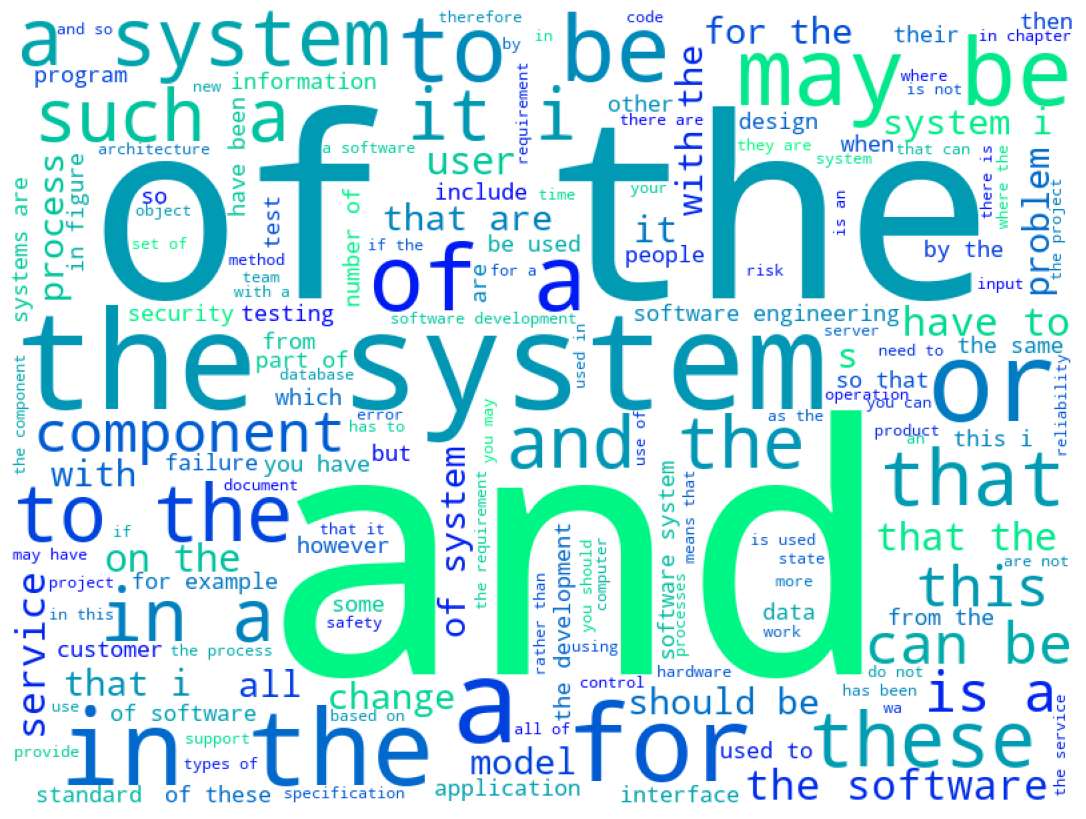

In [14]:
# Word cloud without removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

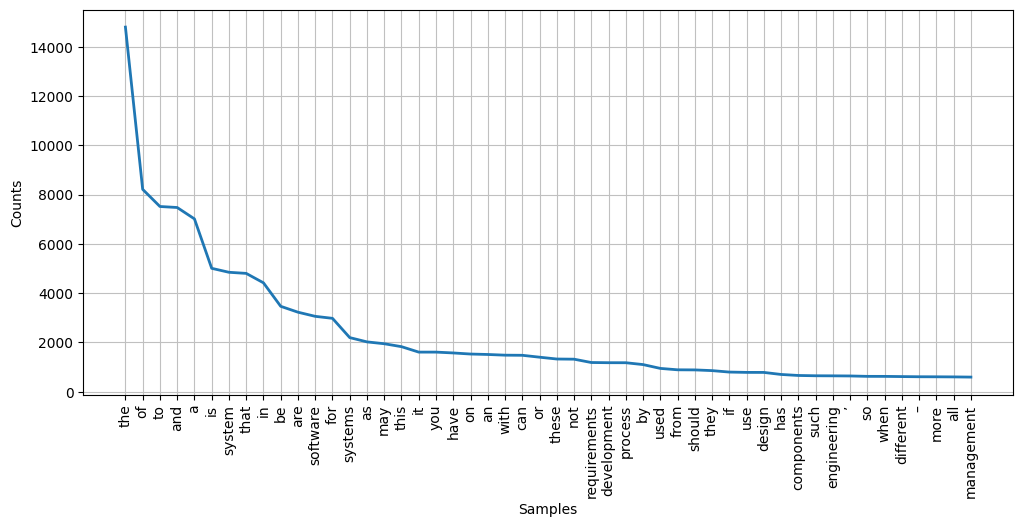

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [15]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(50, cumulative=False)

In [16]:

tokens=word_tokenize(cleantext)
print(len(tokens))
tokens


274665


['globaleditionsoftware',
 'engineeringtenth',
 'editionian',
 'sommervillesoftware',
 'engineeringtenth',
 'editionian',
 'sommervilleboston',
 'columbus',
 'indianapolis',
 'new',
 'york',
 'san',
 'francisco',
 'hobokenamsterdam',
 'cape',
 'town',
 'dubai',
 'london',
 'madrid',
 'milan',
 'munich',
 'paris',
 'montreal',
 'torontodelhi',
 'mexico',
 'city',
 'são',
 'paulo',
 'sydney',
 'hong',
 'kong',
 'seoul',
 'singapore',
 'taipei',
 'tokyoeditorial',
 'director',
 'marcia',
 'hortoneditor',
 'in',
 'chief',
 'michael',
 'hirschacquisitions',
 'editor',
 'matt',
 'goldsteineditorial',
 'assistant',
 'chelsea',
 'bellassistant',
 'acquisitions',
 'editor',
 'globaledition',
 'murchana',
 'borthakurassociate',
 'project',
 'editor',
 'globaledition',
 'binita',
 'roymanaging',
 'editor',
 'jeff',
 'holcombsenior',
 'production',
 'projectmanager',
 'marilyn',
 'lloyddirector',
 'of',
 'marketing',
 'margaret',
 'waplesmarketing',
 'coordinator',
 'kathryn',
 'ferrantisenior',
 

In [17]:
type(tokens)
len(tokens)

274665

In [18]:
frequency_distribution=nltk. FreqDist(tokens)
print (frequency_distribution.most_common(15))
freq_dist=list (frequency_distribution)

[('the', 14796), ('of', 8211), ('to', 7515), ('and', 7474), ('a', 7012), ('is', 5006), ('system', 4845), ('that', 4800), ('in', 4417), ('be', 3464), ('are', 3225), ('software', 3057), ('for', 2976), ('systems', 2194), ('as', 2020)]


### Removing stopwords and tokenising

In [19]:
# Removing stopwords and storing it into finaltext
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(cleantext)
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)

In [20]:
finaltext

'globaleditionsoftware  engineeringtenth  editionian  sommervillesoftware  engineeringtenth  editionian  sommervilleboston  columbus  indianapolis  new  york  san  francisco  hobokenamsterdam  cape  town  dubai  london  madrid  milan  munich  paris  montreal  torontodelhi  mexico  city  são  paulo  sydney  hong  kong  seoul  singapore  taipei  tokyoeditorial  director  marcia  hortoneditor  chief  michael  hirschacquisitions  editor  matt  goldsteineditorial  assistant  chelsea  bellassistant  acquisitions  editor  globaledition  murchana  borthakurassociate  project  editor  globaledition  binita  roymanaging  editor  jeff  holcombsenior  production  projectmanager  marilyn  lloyddirector  marketing  margaret  waplesmarketing  coordinator  kathryn  ferrantisenior  manufacturing  buyer  carol  melvillesenior  manufacturing  controller  productionglobal  edition  trudy  kimbertext  designer  susan  raymondcover  art  designer  lumina  datamaticscover  image  andrey  baydashutterstockint

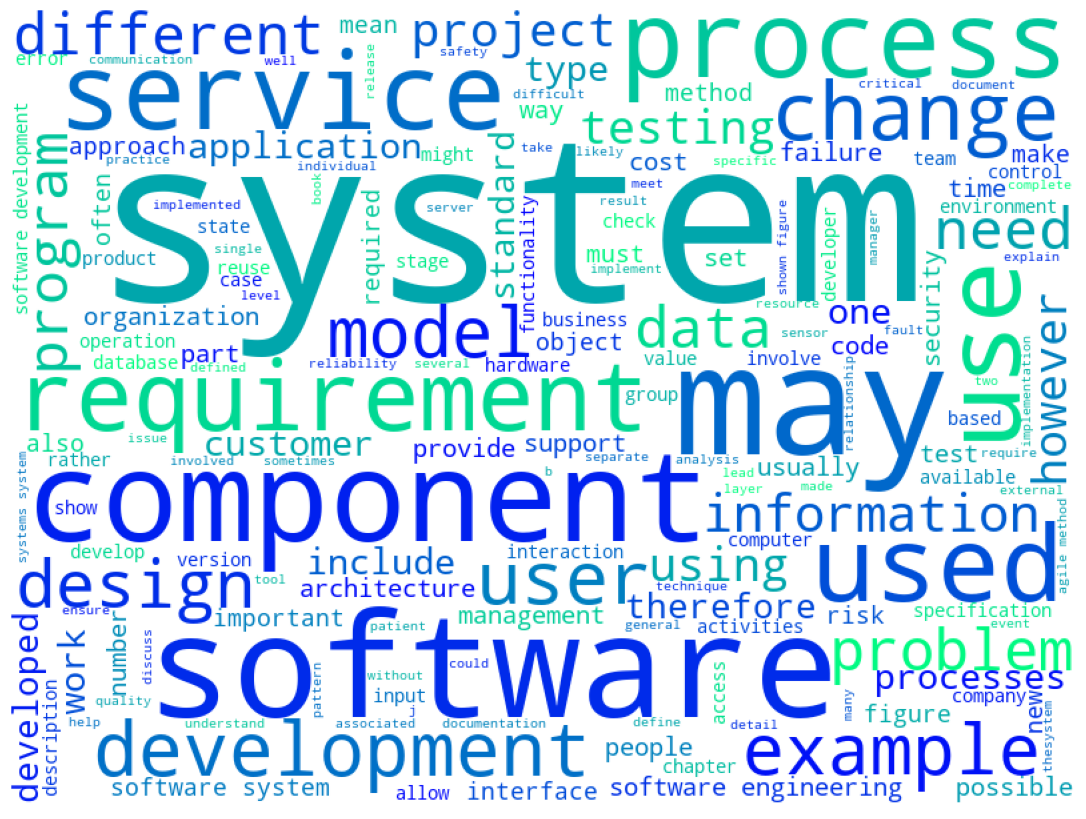

In [21]:
# Word cloud after removing stopwords
wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

### Frequency distribution of tokens

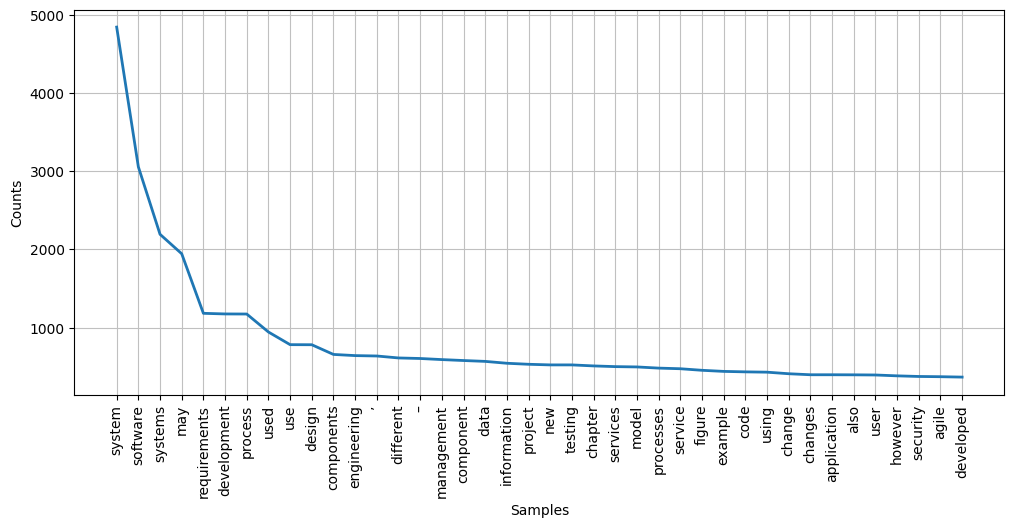

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [22]:
tokens = word_tokenize(finaltext)
tokens = [i for i in tokens if not i in stop_words]
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

In [23]:
frequency_distribution=nltk. FreqDist(tokens)
print (frequency_distribution.most_common(30))
freq_dist=list (frequency_distribution)

[('system', 4845), ('software', 3057), ('systems', 2194), ('may', 1945), ('requirements', 1183), ('development', 1175), ('process', 1174), ('used', 944), ('use', 782), ('design', 781), ('components', 657), ('engineering', 642), ('’', 637), ('different', 612), ('–', 605), ('management', 591), ('component', 579), ('data', 568), ('information', 544), ('project', 531), ('new', 523), ('testing', 523), ('chapter', 510), ('services', 501), ('model', 497), ('processes', 482), ('service', 474), ('figure', 454), ('example', 440), ('code', 434)]


In [24]:
tagged = nltk.pos_tag(tokens)
tagged.sort()
tagged

[('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07a', 'NN'),
 ('\x07a', 'VBP'),
 ('\x07are', 'NNP'),
 ('\x07assume', 'NNP'),
 ('\x07automated', 'VBN'),
 ('\x07briefly', 'NNP'),
 ('\x07changes', 'VBZ'),
 ('\x07compdose', 'NNP'),
 ('\x07complex', 'JJ'),
 ('\x07computes', 'VBZ'),
 ('\x07customers', 'NNS'),
 ('\x07define', 'NN'),
 ('\x07describe', 'NNP'),
 ('\x07design', 'NN'),
 ('\x07design', 'NNP'),
 ('\x07design', 'VBP'),
 ('\x07disabling', 'VBG'),
 ('\x07discuss', 'FW'),
 ('\x07do', 'JJ'),
 ('\x07do', 'NNP'),
 ('\x07does', 'VBP'),
 ('\x07draw', 'JJ'),
 ('\x07draw', 'JJ'),
 ('\x07explain', 'NN'),
 ('\x07explain', 'NN'),
 ('\x07explain', 'NN'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explai

In [25]:
tagged.sort()
tagged

[('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07', 'NNP'),
 ('\x07a', 'NN'),
 ('\x07a', 'VBP'),
 ('\x07are', 'NNP'),
 ('\x07assume', 'NNP'),
 ('\x07automated', 'VBN'),
 ('\x07briefly', 'NNP'),
 ('\x07changes', 'VBZ'),
 ('\x07compdose', 'NNP'),
 ('\x07complex', 'JJ'),
 ('\x07computes', 'VBZ'),
 ('\x07customers', 'NNS'),
 ('\x07define', 'NN'),
 ('\x07describe', 'NNP'),
 ('\x07design', 'NN'),
 ('\x07design', 'NNP'),
 ('\x07design', 'VBP'),
 ('\x07disabling', 'VBG'),
 ('\x07discuss', 'FW'),
 ('\x07do', 'JJ'),
 ('\x07do', 'NNP'),
 ('\x07does', 'VBP'),
 ('\x07draw', 'JJ'),
 ('\x07draw', 'JJ'),
 ('\x07explain', 'NN'),
 ('\x07explain', 'NN'),
 ('\x07explain', 'NN'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'NNP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explai

In [26]:
from collections import Counter
counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 62969, 'JJ': 27074, 'NNS': 24370, 'VBP': 8618, 'RB': 6836, 'VBG': 6137, 'VBN': 5459, 'VBD': 5191, 'VBZ': 4098, 'VB': 4015, 'MD': 2802, 'IN': 1538, 'NNP': 1176, 'CD': 747, 'JJR': 435, 'RBR': 264, 'JJS': 205, 'DT': 166, 'WP': 161, 'FW': 149, 'CC': 75, 'RP': 67, 'PRP': 65, 'WDT': 43, 'WP$': 29, 'RBS': 24, 'WRB': 23, 'NNPS': 6, 'POS': 4, 'EX': 4, 'SYM': 1, 'PRP$': 1})


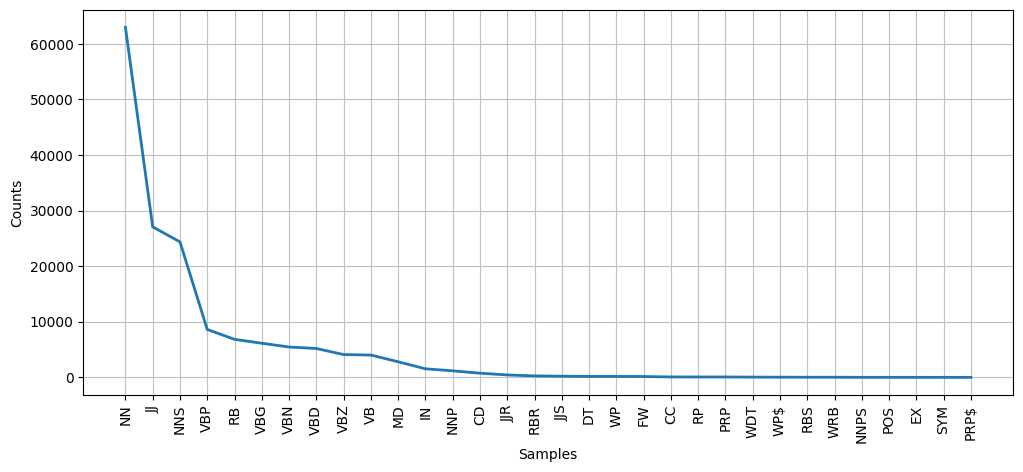

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [27]:
freq_tags = nltk.FreqDist(counts)
plt.figure(figsize=(12,5))
freq_tags.plot(50, cumulative=False)

For word length vs Frequency distribution

In [28]:
length=[] 
for x in tokens:
    length.append(len(x))
length[:25]

frequency_distribution_length=nltk.FreqDist(length)
frequency_distribution_length

FreqDist({7: 23563, 8: 21404, 6: 20694, 9: 14826, 5: 14427, 4: 13095, 10: 12130, 11: 10571, 3: 6788, 12: 6097, ...})

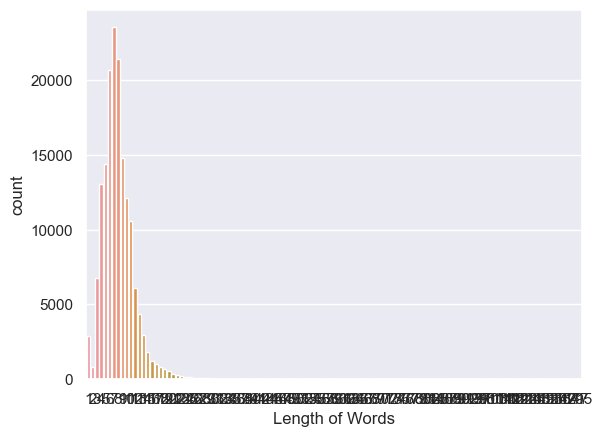

In [29]:
import seaborn as sns
sns.set(style='darkgrid')

df_len=pd.DataFrame(length)

sns.countplot(x=df_len[0]) 
plt.xlabel('Length of Words')
plt.show()

In [30]:
import numpy as np
bin_size=np.linspace(0,16)

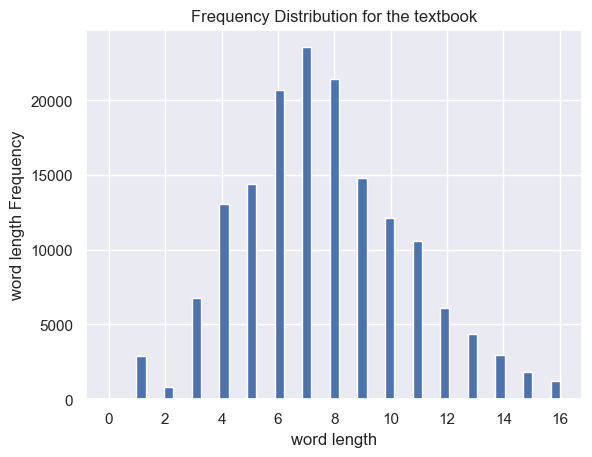

In [31]:
#Finding Wordlength and storing it as a list
wordLength = [len(r) for r in tokens]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the textbook')
plt.show()


In [32]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saksham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
tagged[1000:1050]

[('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidents', 'NNS'),
 ('accidentsa', 'RB'),
 ('accidentsafety', 'NN'),
 ('accidentsthe', 'JJ'),
 ('accidentswe', 'RB'),
 ('accidentwas', 'NN'),
 ('accommodate', 'NN'),
 ('accommodate', 'NN'),
 ('accommodate', 'NN'),
 ('accommodate', 'NN'),
 ('accommodate', 'NN'),
 ('accommodate', 'VBP'),
 ('accommodate', 'VBP'),
 ('accommodated', 'VBD'),
 ('accommodated', 'VBD'),
 ('accommodatefor', 'JJ'),
 ('accommodates', 'VBZ'),
 ('accommodates', 'VBZ'),
 ('accommodatetheir', 'JJ'),
 ('accompaniesthe', 'NN'),
 ('accompanimentinteractions', 'NNS'),
 ('accompany', 'JJ'),
 ('accomplish', 'JJ'),
 ('accomplished', 'VBD

In [34]:
nouns_c=[]
for i in tagged:
  if(i[1][0] == 'N'):
    nouns_c.append(i)


In [49]:
nouns_c[1000:1020]

[('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN'),
 ('activity', 'NN')]

In [36]:
verb_c=[]
for i in tagged:
  if(i[1][0] == 'V'):
    verb_c.append(i)

In [37]:
verb_c[:10]

[('\x07a', 'VBP'),
 ('\x07automated', 'VBN'),
 ('\x07changes', 'VBZ'),
 ('\x07computes', 'VBZ'),
 ('\x07design', 'VBP'),
 ('\x07disabling', 'VBG'),
 ('\x07does', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP'),
 ('\x07explain', 'VBP')]

In [38]:
nltk.download('wordnet')

def create_dictionaries(*args):
    dicts = ({}, {})
    for i in range(2):
        for tag in args[i]:
            syn = wordnet.synsets(tag[0])
            for s in syn:
                x=s.lexname()
                if x[0]=='nv'[i]:
                    if x in dicts[i]:
                        dicts[i][x]+=1
                    else:
                        dicts[i][x]=1

    return dicts



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saksham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
def bar_graph(dictionary, color):
    plt.bar(dictionary.keys(), dictionary.values(), color=color)
    y_pos = range(len(dictionary.keys()))
    plt.xticks(y_pos, dictionary.keys(),  rotation=90)
    plt.show()

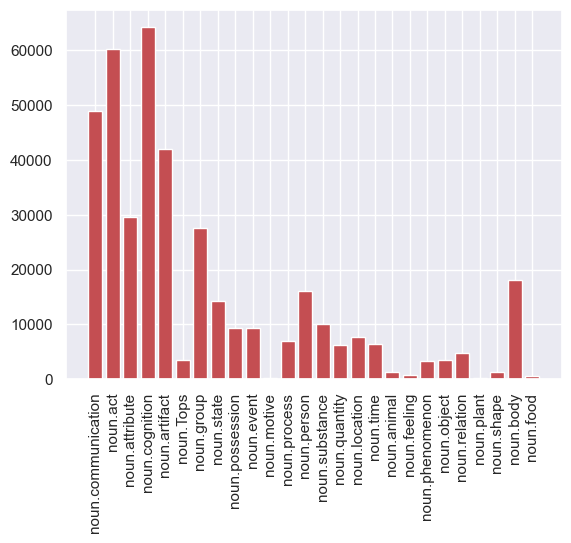

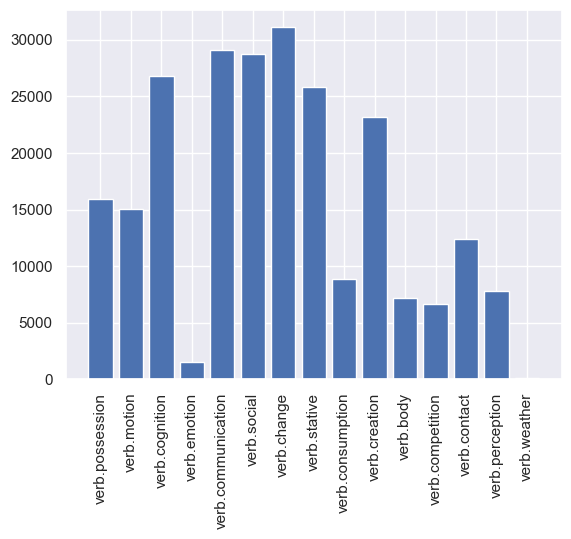

In [40]:
noun_dict, verb_dict = create_dictionaries(nouns_c, verb_c)
bar_graph(noun_dict, 'r')
bar_graph(verb_dict, 'b')

In [41]:
import spacy
ner = spacy.load('en_core_web_sm')

In [42]:
entity_tag_book1 = []
file2 = open("SWE.txt",encoding='utf-8')
wordslist2 = file2.read().splitlines()
wordslist2 = [i for i in wordslist2 if i!='']
book = ""
book = book.join(wordslist2)
bookpart = book[10001:11499]

lst = ner(bookpart)
for word in lst.ents:
  x = word.text
  y = word.label_
  entity_tag_book1.append([x,y])

In [43]:
entity_tag_book1

[['Pearson', 'PERSON'], ['Pearson', 'PRODUCT'], ['Model', 'ORG']]

In [44]:
#PASSAGE FOR EVALUATION OF NER
bookpart = book[50002:55004]
entity_tag_book1 = []
lst = ner(bookpart)
for word in lst.ents:
  x = word.text
  y = word.label_
  entity_tag_book1.append([x,y])



In [45]:
bookpart

'engineering.1.1.3 Internet software engineeringThe development of the Internet and the World Wide Web has had a profoundeffect on all of our lives. Initially, the web was primarily a universally accessibleinformation store, and it had little effect on software systems. These systems ranon local computers and were only accessible from within an organization. Around2000, the web started to evolve, and more and more functionality was added tobrowsers. This meant that web-based systems could be developed where, insteadof a special-purpose user interface, these systems could be accessed using a webbrowser. This led to the development of a vast range of new system products thatdelivered innovative services, accessed over the web. These are often funded byadverts that are displayed on the user’s screen and do not involve direct paymentfrom users.As well as these system products, the development of web browsers that couldrun small programs and do some local processing led to an evolution in b

In [51]:
entity_tag_book1

[['Chapter 17', 'LAW'],
 ['Google Apps', 'ORG'],
 ['Microsoft Office', 'ORG'],
 ['Adobe CreativeSuite', 'ORG'],
 ['Chapter 18.4.Interface', 'LAW'],
 ['AJAX', 'ORG'],
 ['2008', 'DATE'],
 ['HTML5(Freeman 2011', 'DATE'],
 ['withina', 'GPE'],
 ['Software', 'PERSON']]

In [53]:
nltk.download('punkt')
nltk.download('stopwords')
all_stopwords = stopwords.words('english')

tokenized_texts = [[] for _ in range(3)]

for i in range(3):
    with open("SWE.txt".format(i + 1), encoding="utf-8") as text:
        tokenized_texts[i] = nltk.word_tokenize(text.read())
        tokenized_texts[i] = [word for word in tokenized_texts[i] if not word in all_stopwords]
    print(tokenized_texts[i][:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saksham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saksham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Global', 'edition', 'Software', 'Engineering', 'TENTH', 'edition', 'Ian', 'Sommerville', 'Software', 'Engineering', 'Tenth', 'Edition', 'Ian', 'Sommerville', 'Boston', 'Columbus', 'Indianapolis', 'New', 'York', 'San', 'Francisco', 'Hoboken', 'Amsterdam', 'Cape', 'Town', 'Dubai', 'London', 'Madrid', 'Milan', 'Munich', 'Paris', 'Montreal', 'Toronto', 'Delhi', 'Mexico', 'City', 'São', 'Paulo', 'Sydney', 'Hong', 'Kong', 'Seoul', 'Singapore', 'Taipei', 'Tokyo', 'Editorial', 'Director', ':', 'Marcia', 'Horton']
['Global', 'edition', 'Software', 'Engineering', 'TENTH', 'edition', 'Ian', 'Sommerville', 'Software', 'Engineering', 'Tenth', 'Edition', 'Ian', 'Sommerville', 'Boston', 'Columbus', 'Indianapolis', 'New', 'York', 'San', 'Francisco', 'Hoboken', 'Amsterdam', 'Cape', 'Town', 'Dubai', 'London', 'Madrid', 'Milan', 'Munich', 'Paris', 'Montreal', 'Toronto', 'Delhi', 'Mexico', 'City', 'São', 'Paulo', 'Sydney', 'Hong', 'Kong', 'Seoul', 'Singapore', 'Taipei', 'Tokyo', 'Editorial', 'Director',

In [65]:
import spacy
from spacy import displacy
recogniser = spacy.load('en_core_web_sm')

# Function to get tokens of a text and display a NERed text
def NER(tokens):
    text = ' '.join(tokens)
    data = recogniser(text)
    displacy.render(data, style="ent", jupyter=True)

# Description for a few tags
print(spacy.explain("PERSON"))
print(spacy.explain("LOC"))
print(spacy.explain("ORG"))

# Perform NER for all the texts

#NER(tokens[:500])
text5 = ' '.join(tokens[1000:1500])
text5

People, including fictional
Non-GPE locations, mountain ranges, bodies of water
Companies, agencies, institutions, etc.


'change supplementary material book addition video recommendations chapters . I made 40 videos range topics available YouTube channel linked book ’ web pages . In cases I made videos , I recommended YouTube videos may useful . I explain rationale behind changes I ’ made short video : http : //software-engineering-book/videos/10th-edition-changes Readership The book primarily aimed university college students taking introductory advanced courses software systems engineering . I assume readers understand basics programming fundamental data structures . Software engineers industry may find book useful general reading update knowledge topics software reuse , architectural design , dependability security systems engineering . Using book software engineering courses I designed book used three different types software engineering course : 1 . \x07 General introductory courses software engineering . The first part book designed support 1-semester course introductory software engineering . Ther

In [66]:
NER(tokens[1000:1500])